In [11]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import matplotlib.pylab as pll

In [16]:
# 1.Load the data and handle missing values.
fill_data = lambda x: int(x.strip() or 0)
data = np.genfromtxt('presidents.txt', dtype=(int, int), converters={1:fill_data}, delimiter=",")
x = data[:,0]
y = data[:,1]
# 2.Group data using frequency (count of individual data points).
# Given a set of points, Counter() returns a dictionary, 
#where key is a data point,
# and value is the frequency of data point in the dataset.
x_freq = Counter(y)
x_ = np.array(x_freq.keys())
y_ = np.array(x_freq.values())

In [17]:
# 3.Group data by range of years
x_group = OrderedDict()
group = 5
group_count = 1
keys = []
values = []
for i, xx in enumerate(x):
    # Individual data point is appended to list keys
    keys.append(xx)
    values.append(y[i])
    # If we have processed five data points (i.e. five years)
    if group_count == group:
        # Convert the list of keys to a tuple
        # use the new tuple as the ke to x_group dictionary
        x_group[tuple(keys)] = values
        keys = []
        values = []
        group_count = 1
    group_count += 1
#Accomodate the last batch of keys and values
x_group[tuple(keys)] = values

print(x_group)

OrderedDict([((1946, 1947, 1948, 1949, 1950), [41, 23, 16, 28, 20]), ((1951, 1952, 1953, 1954), [11, 19, 14, 39]), ((1955, 1956, 1957, 1958), [32, 14, 16, 6]), ((1959, 1960), [15, 10])])


TypeError: float() argument must be a string or a number, not 'dict_values'

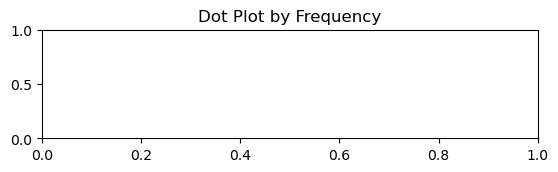

In [18]:
# 4.Plot the grouped data as dot plot.
plt.subplot(311)
plt.title("Dot Plot by Frequency")
# Plot the frequency
plt.plot(y_ , x_ ,'ro')
plt.xlabel('Count')
plt.ylabel('# Presedential Request')
# Set the min and max limits for x axis
plt.xlim(min(y_)-1,max(y_)+1)
plt.subplot(312)
plt.title("Simple dot plot")
plt.xlabel('# Presendtial Request')
plt.ylabel('Frequency')